# WORK 1 拓展
Hanxue Yu . 2023/3/14

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy.io import loadmat
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from cartopy.mpl.ticker import LongitudeFormatter,LatitudeFormatter
import netCDF4 as nc
import h5py

In [2]:
data=h5py.File('sst_Argo_201511.mat')
print(data.keys())

<KeysViewHDF5 ['lat', 'lon', 'temp']>


c:\ProgramData\Anaconda3\envs\pynb\lib\site-packages\matplotlib\collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


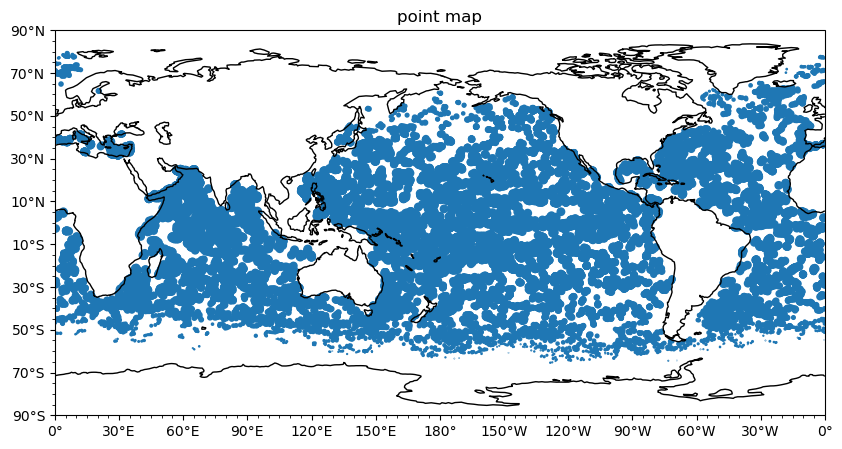

In [33]:
lat=np.array(data['lat'],dtype=float).flatten()
lon=np.array(data['lon'],dtype=float).flatten()
temp=np.array(data['temp'],dtype=float).flatten()
nans=[]
for i in range(temp.shape[0]):
    if np.isnan(temp[i]):
        nans.append(i)
temp=np.delete(temp,nans)
lat=np.delete(lat,nans)
lon=np.delete(lon,nans)
global lat,lon,temp
plt.figure(figsize=[10,5])
ax=plt.axes(facecolor='white', projection=ccrs.PlateCarree(central_longitude=180))
ax.scatter(lon,lat,temp,transform=ccrs.PlateCarree(central_longitude=0))
ax.xaxis.set_major_formatter(LongitudeFormatter())#刻度格式转换为经纬度样式 
ax.yaxis.set_major_formatter(LatitudeFormatter())
ax.xaxis.set_minor_locator(mticker.MultipleLocator(5))#刻度格式转换为经纬度样式 
ax.yaxis.set_minor_locator(mticker.MultipleLocator(5))
ax.coastlines()
ax.set_xticks(np.arange(-180,181,30))
ax.set_yticks(np.arange(-90,91,20))
ax.set_title('point map')
plt.show()

In [31]:
lats=np.arange(int(np.min(lat)),int(np.max(lat))+1,1)
lons=np.arange(int(np.min(lon)),int(np.max(lon))+1,1)
Lat,Lon=np.meshgrid(lons,lats)
def interp1(log,la,lo):
    global lat,lon,temp
    p=2
    #print(f'la:{la},lo:{lo}'la)
    #print(lat[log])
    #print(lon[log])
    #print(temp[log])
    dp=(np.abs(lat[log]**2-la**2)+np.abs(lon[log]**2-lo**2))**0.5**p
    return np.nansum(temp[log]/dp)/np.nansum(1/dp)
def getpoints(la,lo,d=3):
    global lat,lon,temp
    log_a=(np.abs(lat-la)**2+np.abs(lon-lo)**2)<d**2
    log_b=(np.abs(lat-la)**2+np.abs(lon-lo)**2)==d**2
    #print(f'[{np.sum(log_a)}],[{np.sum(log_b)}]')
    if np.sum(log_b)!=0:
        return temp[log_b]
    elif np.sum(log_a)==0:
        return np.nan
        print(lats[log_a])
    else:
        return interp1(log_a,la,lo)
sst=np.zeros(shape=[lats.shape[0],lons.shape[0]])
sst[:,:]=np.nan
for i in range(lats.shape[0]):
    for j in range(lons.shape[0]):
        sst[i,j]=getpoints(lats[i],lons[j])

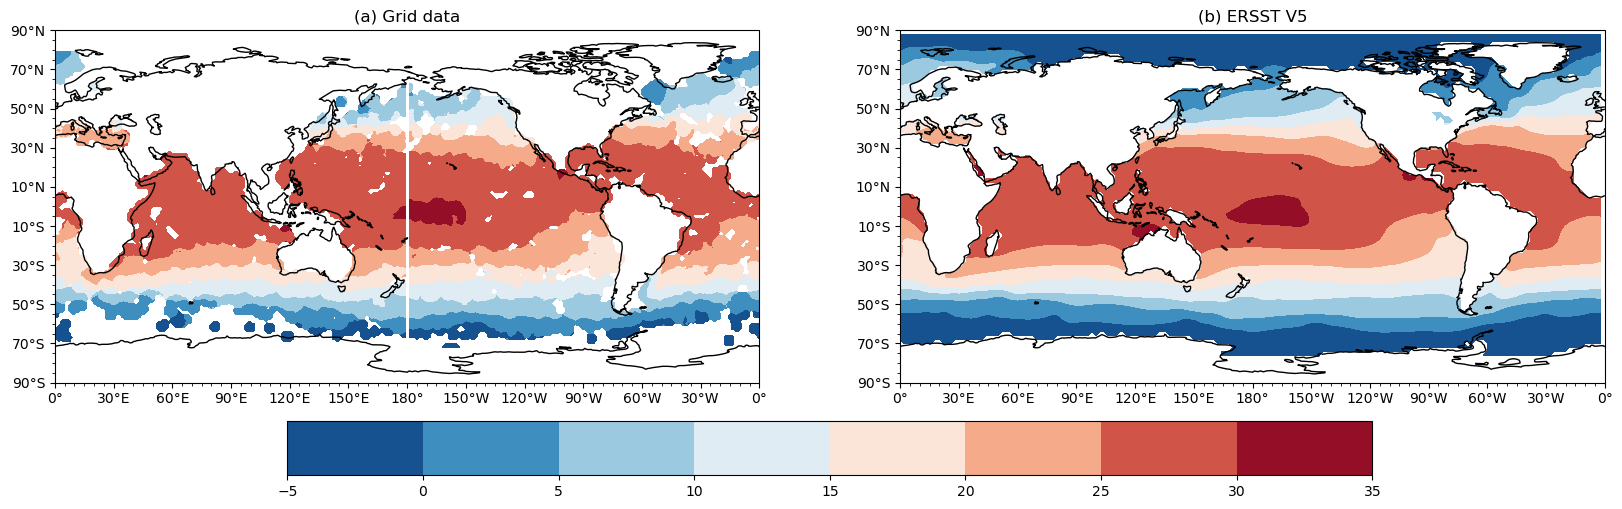

In [71]:
fig, axs = plt.subplots(1,2, figsize=(20,10),subplot_kw=dict(facecolor='white', projection=ccrs.PlateCarree(central_longitude=180)))
axs=axs.flatten()
ax=axs[0]
c=ax.contourf(Lat+180,Lon,sst,np.arange(-5,36,5),cmap='RdBu_r',transform=ccrs.PlateCarree(central_longitude=180))
ax.xaxis.set_major_formatter(LongitudeFormatter())#刻度格式转换为经纬度样式 
ax.yaxis.set_major_formatter(LatitudeFormatter())
ax.xaxis.set_minor_locator(mticker.MultipleLocator(5))#刻度格式转换为经纬度样式 
ax.yaxis.set_minor_locator(mticker.MultipleLocator(5))
ax.coastlines()
ax.set_xticks(np.arange(-180,181,30))
ax.set_yticks(np.arange(-90,91,20))
ax.set_title('(a) Grid data')
ax=axs[1]
ds=nc.Dataset('ersst.v5.201511.nc')
ds.variables.keys()
er_lat=np.array(ds['lat'])
er_lon=np.array(ds['lon'])
er_sst=np.array(ds['sst'])
er_sst[er_sst<-200]=np.nan
er_lat,er_lon=np.meshgrid(er_lon,er_lat)
c=ax.contourf(er_lat,er_lon,er_sst[0,0,:,:],np.arange(-5,36,5),cmap='RdBu_r',transform=ccrs.PlateCarree(central_longitude=0))
ax.xaxis.set_major_formatter(LongitudeFormatter())#刻度格式转换为经纬度样式 
ax.yaxis.set_major_formatter(LatitudeFormatter())
ax.xaxis.set_minor_locator(mticker.MultipleLocator(5))#刻度格式转换为经纬度样式 
ax.yaxis.set_minor_locator(mticker.MultipleLocator(5))
ax.coastlines()
ax.set_xticks(np.arange(-180,181,30))
ax.set_yticks(np.arange(-90,91,20))
ax.set_title('(b) ERSST V5')

plt.colorbar(c,ax=[axs[i] for i in range(2)],orientation="horizontal",extend='both',shrink=0.7,pad=0.05)
plt.show()

In [70]:
ds=nc.Dataset('ersst.v5.201511.nc')
ds.variables.keys()
nc.num2date(ds['time'],ds['time'].units)

masked_array(data=[cftime.DatetimeGregorian(2015, 11, 1, 0, 0, 0, 0, has_year_zero=False)],
             mask=False,
       fill_value='?',
            dtype=object)

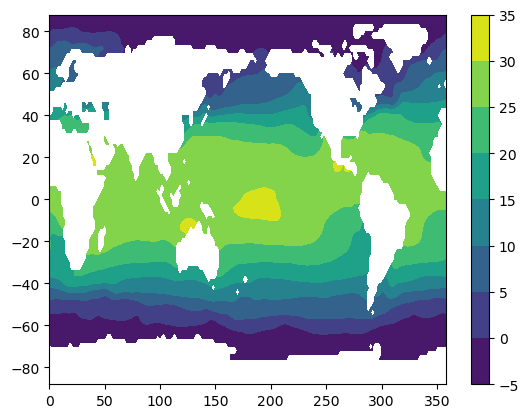

In [8]:

ds=nc.Dataset('ersst.v5.201511.nc')
ds.variables.keys()
er_lat=np.array(ds['lat'])
er_lon=np.array(ds['lon'])
er_sst=np.array(ds['sst'])
er_sst[er_sst<-200]=np.nan
er_lat,er_lon=np.meshgrid(er_lon,er_lat)
plt.contourf(er_lat,er_lon,er_sst[0,0,:,:])
plt.colorbar()